In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-03 15:30:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

FuelConsumption.csv 100%[===================>]  70.93K   352KB/s    in 0.2s    

2022-02-03 15:30:31 (352 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [5]:
# select attributes to keep

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

Text(0, 0.5, 'EMISSIONS')

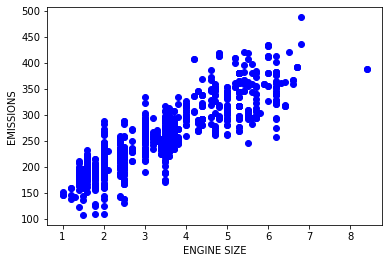

In [6]:
# plot

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('EMISSIONS')

In [7]:
# create test and training sets

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

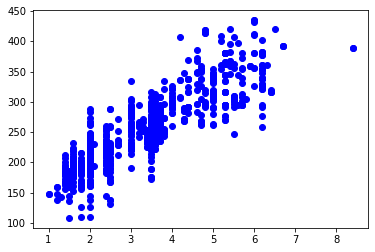

In [8]:
# training data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
regr.fit (x,y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[9.37945384 8.36254627 9.54355031]]
Intercept:  [65.85717372]


In [12]:
# coeffecients above show how engine size and consumption have a similar effect on emissions 
# whereas the number of cylinders is slightly less impactfull

In [13]:
# ordinary least squares (OLS)

# method to minimise sum of squared errors (SSE) or mean squared error (MSE) 
# between target variable (y) and predicted output (y_hat) over all samples within dataset

# OLS can find best parameters using:
# closed form equations (analytical method)
# using optimisation algorithm (gradient descent, stochastic gradient descent, newton's method etc.)

In [23]:
# prediction

y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(test[['CO2EMISSIONS']])
print('Residual sum of squares: %.2f'
     % np.mean((y_hat - y) ** 2))

# variance score (1 is perfect prediction)
print('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 568.07
Variance score: 0.87


/Users/tomjenkinson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# note:
# when:
# y_hat = prection
# y = correct value
# Var = variance (square of s.d)

# explained variance (y, y_hat) (as estimate):

#        1 - (   (Var(y-y_hat))  /  (Var(y))    )